In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
class KNN:
    def __init__(self,data,r1,K):
        data=data.sample(frac=1).reset_index(drop=True)
        
        l1=int(r1*data.shape[0])
        self.X_train=data.loc[0:l1-1,data.columns!="label"].to_numpy()
        self.y_train=data.loc[0:l1-1,"label"].to_numpy()
        self.X_train=self.X_train/255
        
        self.X_test=data.loc[l1:,data.columns!="label"].to_numpy()
        self.y_test=data.loc[l1:,"label"].to_numpy()
        self.X_test=self.X_test/255

        self.K=K

    def Z_score_normalization(self,x):
        mean=np.mean(x,axis=0)
        standard_deviation=np.std(x,axis=0)
        x=(x-mean)/standard_deviation
        return x,mean,standard_deviation

    def euclidean_dist(self,x_test):
        # d=np.sqrt(np.sum((x2-x1)**2,axis=1))
        self.d=np.sum(x_test**2,axis=1)[:,np.newaxis]+np.sum(self.X_train**2,axis=1)-2*np.dot(x_test,self.X_train.T)
        return self.d

    # def L1_dist(self,x_test):
    #     d=np.zeros((X_test.shape[0],X_train.shape[0]))
    #     for i in range()

    def k_nearest_labels(self,x_test):
        distances=self.euclidean_dist(x_test)
        indices=np.argsort(distances,axis=1)[:,0:self.K]
        labels=np.array([self.y_train[idx] for idx in indices])
        return labels

    def prediction(self,x_test):
        labels=self.k_nearest_labels(x_test)
        y_pred=[]
        for l in labels:
            u,c=np.unique(l,return_counts=True)
            y_pred.append(u[np.argmax(c)])
        return np.array(y_pred)

    def accuracy(self,y_pred,y):
        accuracy=np.sum(y_pred==y)/y_pred.shape[0]
        return accuracy

In [14]:
train_data=pd.read_csv('Classification_train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
accuracies=[]
for k in range(1,11):
    model=KNN(train_data,0.8,k)
    y_pred=model.prediction(model.X_test)
    accuracies.append(model.accuracy(y_pred,model.y_test))

Text(0, 0.5, 'Accuracy')

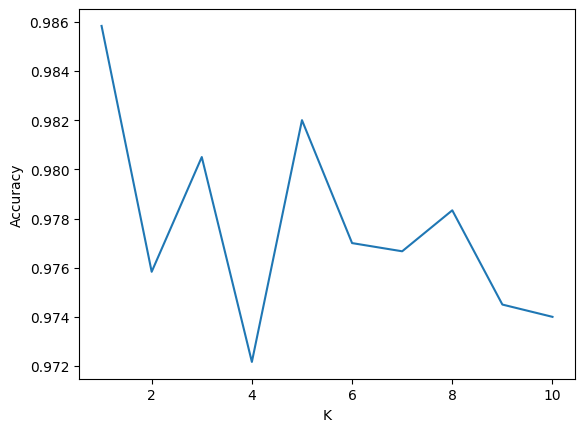

In [20]:
plt.plot(np.arange(1,11),accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')

In [21]:
accuracies[0]

0.9858333333333333

In [22]:
model=KNN(train_data,0.8,1)

In [23]:
y_pred=model.prediction(model.X_test)

In [24]:
model.accuracy(y_pred,model.y_test)

0.9811666666666666

In [23]:
test_x=test_data.iloc[:,1:].to_numpy()/255
test_y=test_data.iloc[:,0].to_numpy()

In [25]:
test_pred=model.prediction(test_x)

In [26]:
df=pd.DataFrame(test_pred)

In [25]:
test_data=pd.read_csv('Classification_test.csv')
test_data.head()

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,15795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11964,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test_x=test_data.iloc[:,1:].to_numpy()

In [30]:
test_y=model.prediction(test_x/255)

In [31]:
df = pd.DataFrame({'ID': test_data.iloc[:,0], 'label': test_y})
df.to_csv('result_knn.csv')